In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. SURVEYS VOTES. SOCIO-DEM

In this notebook, we conduct a detailed statistical analysis of the survey responses. Specifically, we explore the distributions and patterns of the three key thermal perception questions: Thermal Survey, Thermal Comfort and Walking Thermal Comfort. We use histograms and bar plots to visualize and explore how thermal perceptions vary across different sociodemographic groups. In particular, we look at the neighbourhood knowledge of the participants and the time they spent in the public space. We also correlate the votes with the space categoryes (rest place, meeting place, etc). Finally, we study the correlation between the sociodemographic statistics (e.g., age vs gender).

We use the dataset **all_surveys(votes).csv**: This dataset contains one row per vote (i.e., a TSV/TCV/wTCV response), along with the corresponding sociodemographic information of the respondent. Note: Since participants provided responses at multiple stops, individual participants may appear more than once.



### INDEX

<br>

1. Socio-demographic statistics for neigbhourhood knowledge and time spent: TCV, wTCV and TSV

        1.1. General statistics
            1.1.1. Neighbourhood knwoledge
            1.1.2. Spent time in public space
        
        1.2. Statistics for TCV, wTCV and TSV
            1.2.1. Neighbourhood knwoledge
            1.2.2. Spent time in public space
        
        1.3. Histograms
            1.3.1. Neighbourhood knwoledge
            1.3.2. Spent time in public space
        
   
<br>       
       
2. Space category: TCV, wTCV and TSV

       2.1. Statistics
       
       2.2. Histograms
       
        
      
        
<br>       
       
3. Space category: 2 large groups (W and BN)

<br>


4. Correlation between sociodemographic traits

       4.1. Age vs Spent time
       
       4.2. Age vs Neighbourhood knowledge
       
       4.2. Gender vs Spent time
       
       4.2. Gender vs neighbourhood knowledge
       
       4.2. Gender vs Age
       
       4.2. Spent time vs Neighbourhood knowledge
        

## 0. Read data-sets

In [3]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

## 1. Socio-demographic statistics for neigbhourhood knowledge and time spent: TCV, wTCV and TSV


### 1.1. General statistics
#### 1.1.1. Neighbourhood knowledge

neighbourhood_knowledge2
Very good knowledge     628
Good knowledge          526
Medium knowledge        384
No/Partial knowledge    329
Name: count, dtype: int64

neighbourhood_knowledge2
Very good knowledge     33.6
Good knowledge          28.2
Medium knowledge        20.6
No/Partial knowledge    17.6
Name: proportion, dtype: float64


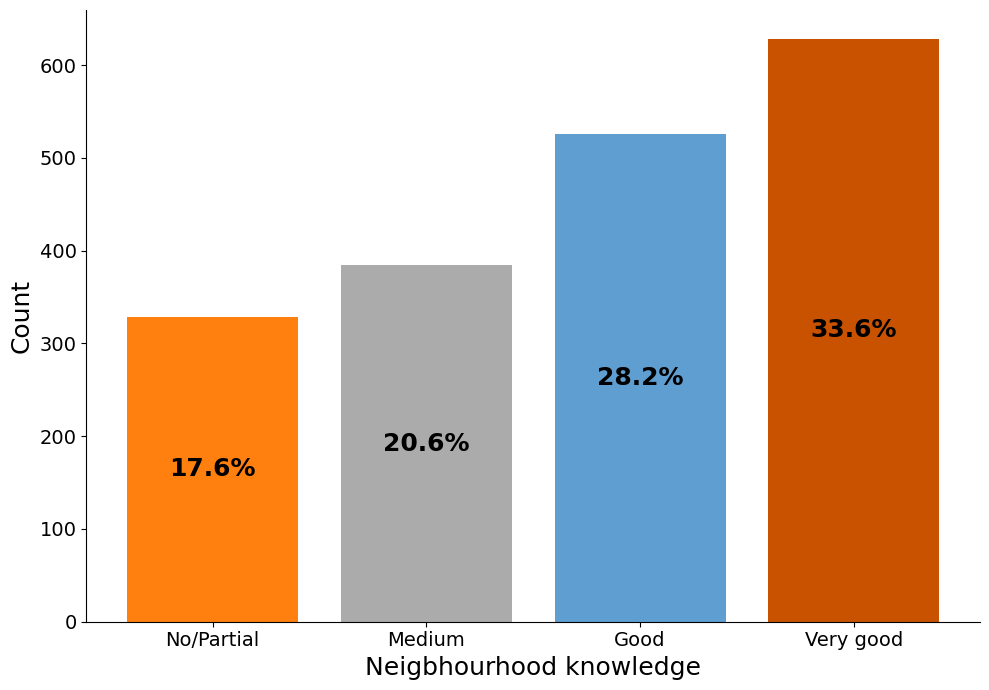

In [6]:
print(df_votes['neighbourhood_knowledge2'].value_counts())
print('')

print(df_votes['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))


neigh_order = ['No/Partial knowledge','Medium knowledge','Good knowledge','Very good knowledge']

# Count the number of occurrences for each neighbourhood group and sort
counts = df_votes['neighbourhood_knowledge2'].value_counts().reindex(neigh_order)
total = counts.sum()

neigh_labels_raw = counts.index.tolist()
neigh_labels_clean = ['No/Partial', 'Medium', 'Good', 'Very good']  # For display

# Define custom colors for each neighbourhood group (optional, can be changed)
colors = ["#FF800E", "#ABABAB","#5F9ED1","#C85200"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(neigh_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=18, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Neigbhourhood knowledge', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



#### 1.1.2. Time spent in public space

spent_time2
2h - 4h    552
1h - 2h    478
>4h        458
<1h        379
Name: count, dtype: int64

spent_time2
2h - 4h    29.6
1h - 2h    25.6
>4h        24.5
<1h        20.3
Name: proportion, dtype: float64


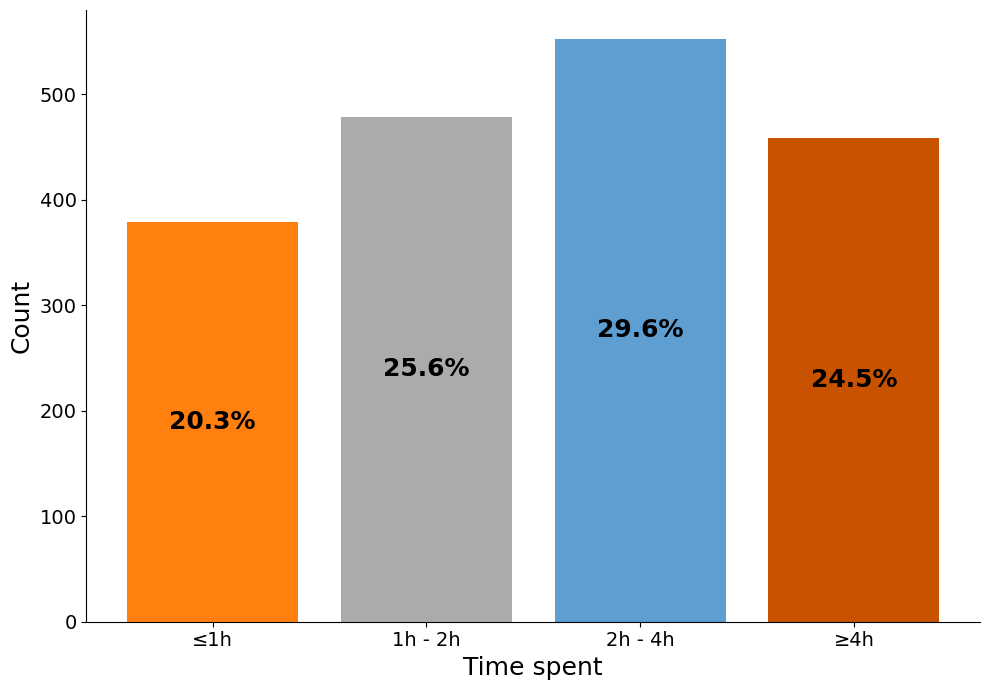

In [10]:
print(df_votes['spent_time2'].value_counts())
print('')

print(df_votes['spent_time2'].value_counts(normalize=True).mul(100).round(1))


time_order = ['<1h','1h - 2h', '2h - 4h', '>4h']

# Count the number of occurrences for each time spent group and sort
counts = df_votes['spent_time2'].value_counts().reindex(time_order)
total = counts.sum()

# Clean up the time spent group labels 
time_labels_raw = counts.index.tolist()
time_labels_clean = ['≤1h', '1h - 2h', '2h - 4h', '≥4h']  # For display

# Define custom colors for each time spent group (optional, can be changed)
colors = ["#FF800E", "#ABABAB","#5F9ED1","#C85200"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(time_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=18, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Time spent', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



### 1.2. Statistics for TCV, wTCV and TSV

#### 1.2.1. Neighbourhood knowledge

In [11]:
columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['neighbourhood_knowledge2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_comfort
################

Good knowledge
-------
thermal_comfort
Neutral                   143
Slightly uncomfortable    105
Slightly comfortable       93
Comfortable                81
Uncomfortable              59
Very comfortable           23
Very uncomfortable         22
Name: count, dtype: int64

Medium knowledge
-------
thermal_comfort
Neutral                   106
Comfortable                71
Slightly comfortable       63
Slightly uncomfortable     57
Uncomfortable              45
Very uncomfortable         24
Very comfortable           18
Name: count, dtype: int64

No/Partial knowledge
-------
thermal_comfort
Neutral                   95
Slightly uncomfortable    60
Comfortable               49
Uncomfortable             44
Slightly comfortable      42
Very uncomfortable        21
Very comfortable          18
Name: count, dtype: int64

Very good knowledge
-------
thermal_comfort
Neutral                   176
Comfortable               119
Slightly comfort

#### 1.2.2. Spent time im public space

In [12]:
columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes.groupby(['spent_time2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_comfort
################

1h - 2h
-------
thermal_comfort
Neutral                   120
Comfortable               113
Slightly comfortable       85
Slightly uncomfortable     76
Uncomfortable              50
Very comfortable           21
Very uncomfortable         13
Name: count, dtype: int64

2h - 4h
-------
thermal_comfort
Neutral                   167
Slightly comfortable      100
Slightly uncomfortable     93
Comfortable                81
Uncomfortable              64
Very comfortable           31
Very uncomfortable         16
Name: count, dtype: int64

<1h
-------
thermal_comfort
Neutral                   102
Slightly uncomfortable     62
Comfortable                50
Slightly comfortable       48
Uncomfortable              47
Very comfortable           42
Very uncomfortable         28
Name: count, dtype: int64

>4h
-------
thermal_comfort
Neutral                   131
Comfortable                76
Slightly uncomfortable     72
Slightly comfortable       6

### 1.3. Histograms


The histograms are normalized such as the votes for each "answer" sum 1. In this way, this histogram is useful to compare a given socio-dem category in a given (individual) answer of the survey. 

For example: if we analyze the answer "Very uncomfortable" from the "Thermal comfort" histogram, we'll see how many votes correspond to category. In other words, for example, "If I vote this answer of thermal comfort, what is the probability that I'm <12 or 13-15 or...?"

Note that this normalization does not allow us to compare the whole distribution (tendency) of votes, we use the horitzontal bar-plots for this purpose).


In [13]:
def grouped_histogram(df, response_col, group_col, category_order, group_palette=None, hue_order=None,
                      xlabel=None, ylabel='Probability', legend_title=None, group_labels=None, figsize=(1.5, 5)):
    '''
    Plots a grouped bar chart showing the normalized distribution of a categorical response variable
    (e.g., thermal comfort) across different groups (e.g., gender,age).

    Parameters:
        df (pd.DataFrame): The input DataFrame containing both the response and group columns.
        response_col (str): Name of the column containing the survey responses (e.g., 'thermal_comfort').
        group_col (str): Name of the grouping column (e.g., 'gender').
        category_order (list): Ordered list of response categories for the x-axis.
        group_palette (list or dict): Custom color palette for the groups.
        hue_order (list): Specific order of group values (e.g., ['Man', 'Woman']).
        xlabel (str): Label for the x-axis. If None, uses `response_col`.
        ylabel (str): Label for the y-axis.
        legend_title (str): Title for the legend (hue).
        group_labels (list): Replacement labels for the legend (e.g., ['Men', 'Women']).
        figsize (tuple): Aspect and height of the figure (aspect, height).
    
    Returns:
        None. Displays the plot directly.
    '''

    # Normalize counts (grouped by response and group column)
    df_norm = df.groupby(response_col)[group_col].value_counts(normalize=True).rename('proportion').reset_index()

    # Ensure correct order of the response categories
    df_norm[response_col] = pd.Categorical(df_norm[response_col], categories=category_order, ordered=True)
    df_norm.sort_values(by=response_col, inplace=True)

    # Plot
    aspect, height = figsize
    g = sns.catplot(
        x=response_col,
        y='proportion',
        hue=group_col,
        kind='bar',
        data=df_norm,
        palette=group_palette,
        hue_order=hue_order,
        alpha=1.0,
        width=0.6,
        height=height,
        aspect=aspect
    )

    # Format axis labels and ticks
    g.set_xticklabels(category_order, rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    g.set_axis_labels(xlabel or response_col, ylabel, fontsize=13)

    # Legend title
    if legend_title:
        g._legend.set_title(legend_title)

    # Replace legend labels if provided
    if group_labels:
        for t, new_label in zip(g._legend.texts, group_labels):
            t.set_text(new_label)

    plt.show()

    
    

#### 1.3.1. Neighbourhood knowledge

Thermal comfort TCV


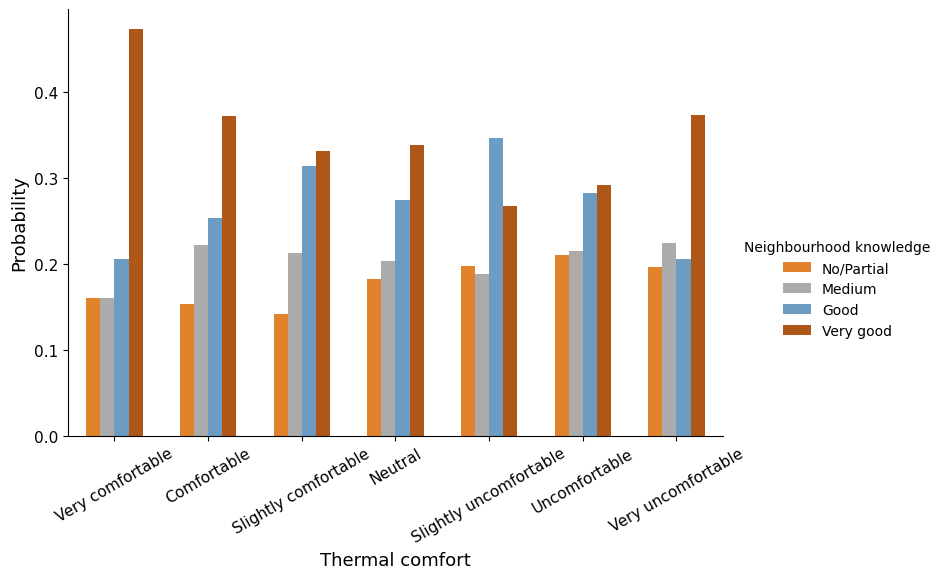

Walking thermal comfort wTCV


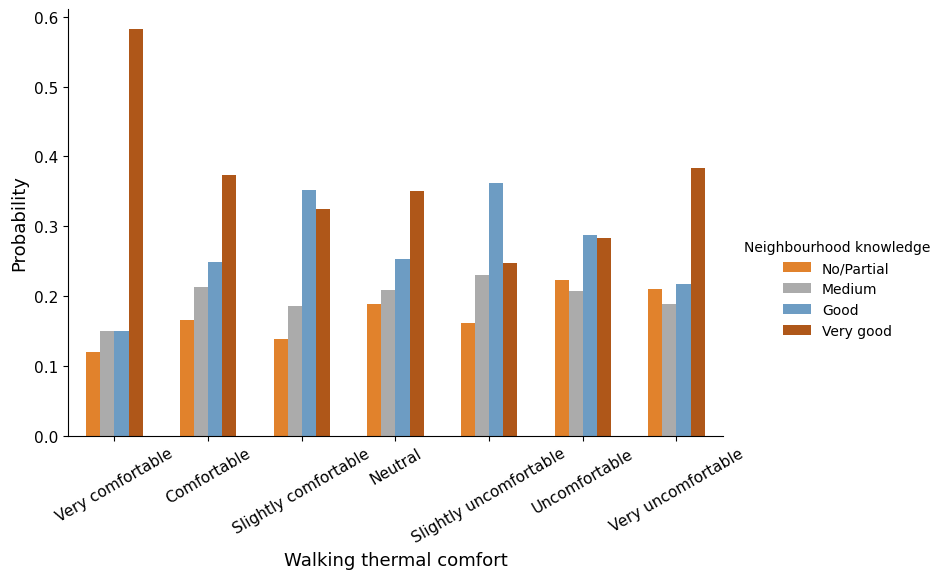

Thermal sensation TSV


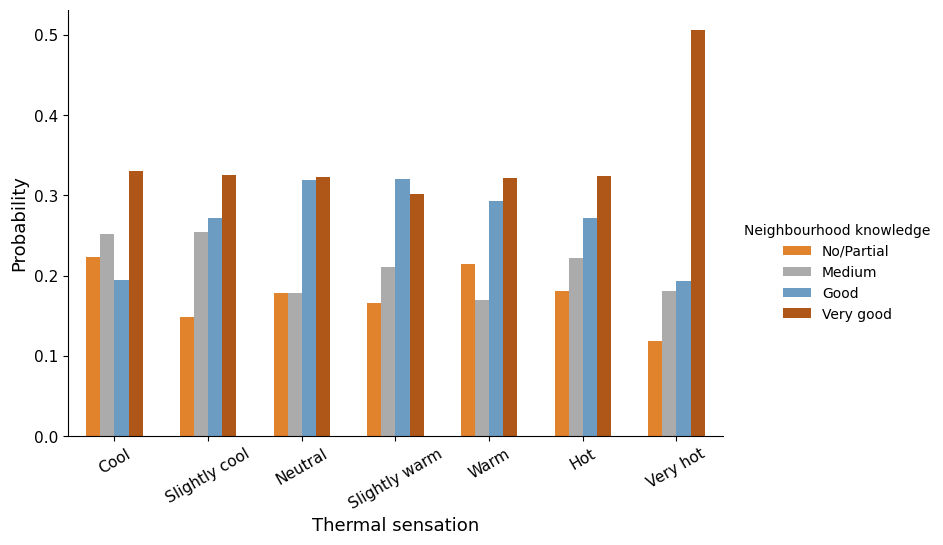

In [14]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


neigh_order = ['No/Partial knowledge','Medium knowledge','Good knowledge','Very good knowledge']
neigh_labels_clean = ['No/Partial', 'Medium', 'Good', 'Very good']
palette_neigh = ["#FF800E", "#ABABAB","#5F9ED1","#C85200"]


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort',group_col = 'neighbourhood_knowledge2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_neigh, hue_order = neigh_order, xlabel='Thermal comfort',
                  legend_title = 'Neighbourhood knowledge', group_labels = neigh_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort_walking',group_col = 'neighbourhood_knowledge2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_neigh, hue_order = neigh_order, xlabel='Walking thermal comfort',
                  legend_title = 'Neighbourhood knowledge', group_labels = neigh_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes, response_col = 'thermal_sensation',group_col = 'neighbourhood_knowledge2', category_order = categories_TSV, 
                  group_palette = palette_neigh, hue_order = neigh_order, xlabel='Thermal sensation',
                  legend_title = 'Neighbourhood knowledge', group_labels = neigh_labels_clean) 

#### 1.3.2. Spent time in public space

Thermal comfort TCV


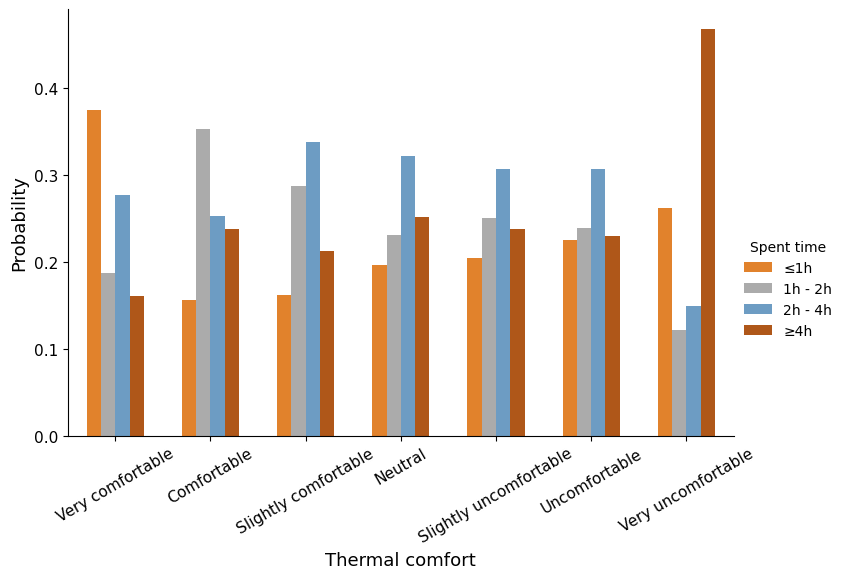

Walking thermal comfort wTCV


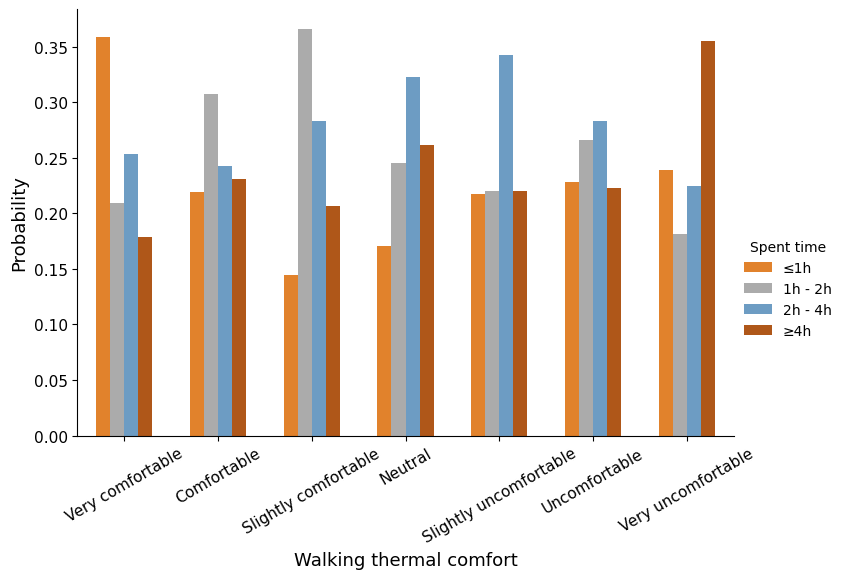

Thermal sensation TSV


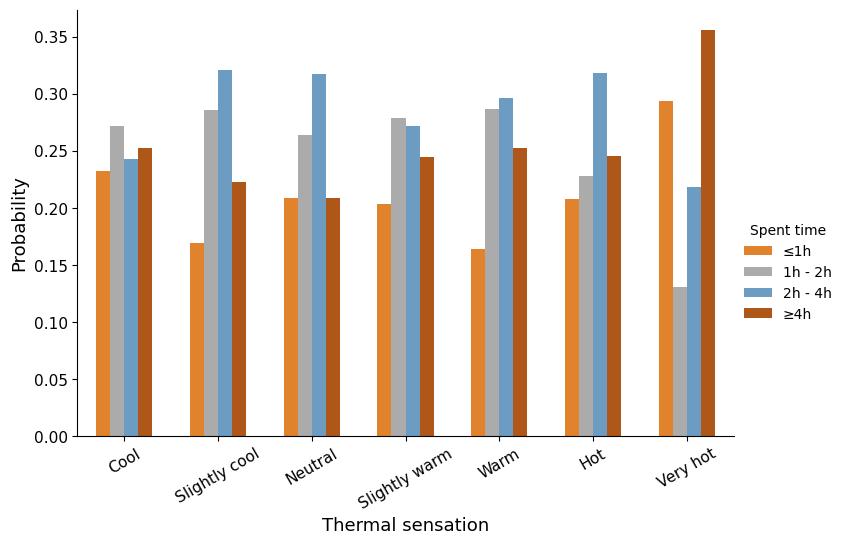

In [16]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


spent_time_order = ['<1h','1h - 2h', '2h - 4h', '>4h']
spent_time_labels_clean = ['≤1h', '1h - 2h', '2h - 4h', '≥4h']
palette_spent_time = ["#FF800E", "#ABABAB","#5F9ED1","#C85200"]

# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort',group_col = 'spent_time2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_spent_time, hue_order = spent_time_order, xlabel='Thermal comfort',
                  legend_title = 'Spent time', group_labels = spent_time_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort_walking',group_col = 'spent_time2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_spent_time, hue_order = spent_time_order, xlabel='Walking thermal comfort',
                  legend_title = 'Spent time', group_labels = spent_time_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes, response_col = 'thermal_sensation',group_col = 'spent_time2', category_order = categories_TSV, 
                  group_palette = palette_spent_time, hue_order = spent_time_order, xlabel='Thermal sensation',
                  legend_title = 'Spent time', group_labels = spent_time_labels_clean) 

<br>

## 2. Space category: TCV, wTCV and TSV

### 2.1. Statistics

In order to study how the votes are distributed across the different space categories, we need to merge both data sets (stops and votes). We use the "space_code" to merge, which is common in both data-sets. The new data-set contains all the ~2000 votes but with a new column called "space_category", which indicates de category of each stop. 

Note that the data-set "votes" contains all the votes. Therefore, a given place (stop) and therefore its category, can be repeated many times.

In [17]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_stops = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(stops).csv')  # votes

df_votes_merged = pd.merge(df_votes,df_stops[['space_code','space_category']],on='space_code')

space_category
MP    481
E     401
RP    264
CF    258
TS    190
SE     81
T      76
H      62
M      54
Name: count, dtype: int64

--------------------------------------

space_category
MP    25.8
E     21.5
RP    14.1
CF    13.8
TS    10.2
SE     4.3
T      4.1
H      3.3
M      2.9
Name: proportion, dtype: float64


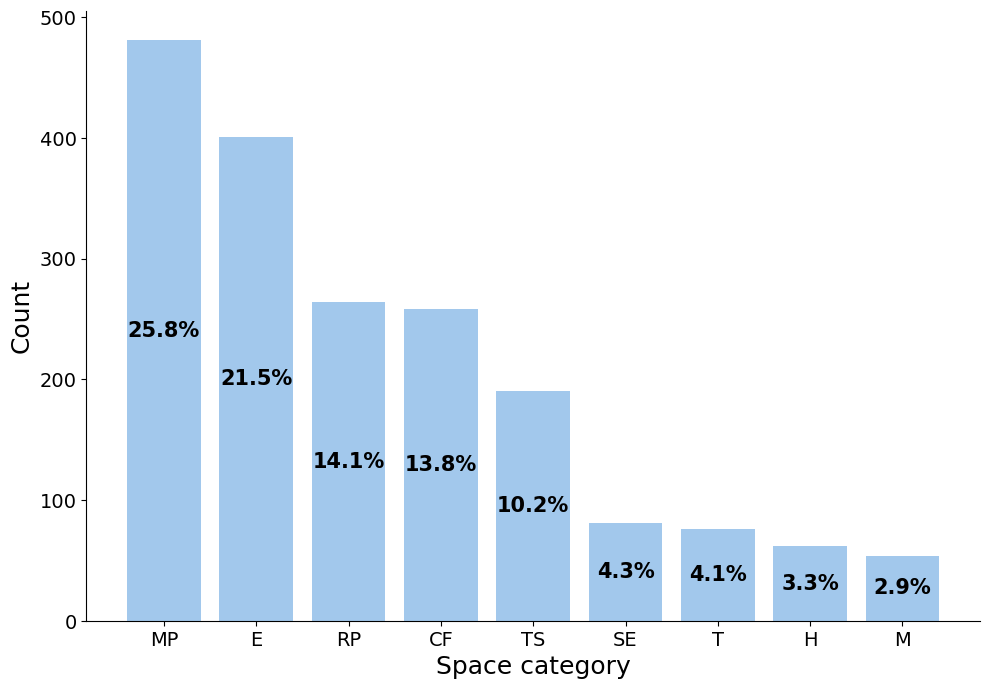

In [24]:
print(df_votes_merged['space_category'].value_counts())
print('')
print('--------------------------------------')
print('')
print(df_votes_merged['space_category'].value_counts(normalize=True).mul(100).round(1))


space_order = ['MP','E','RP','CF', 'TS', 'SE', 'T', 'H', 'M']

# Count the number of occurrences for each neighbourhood group and sort
counts = df_votes_merged['space_category'].value_counts().reindex(space_order)
total = counts.sum()

space_labels_raw = counts.index.tolist()
space_labels_clean = ['MP','E','RP','CF', 'TS', 'SE', 'T', 'H', 'M']  # For display

# Define custom colors for each neighbourhood group (optional, can be changed)
colors = ["#A2C8EC", "#A2C8EC","#A2C8EC","#A2C8EC","#A2C8EC","#A2C8EC","#A2C8EC","#A2C8EC","#A2C8EC"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(space_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=15, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Space category', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.2. Histograms

Thermal comfort TCV


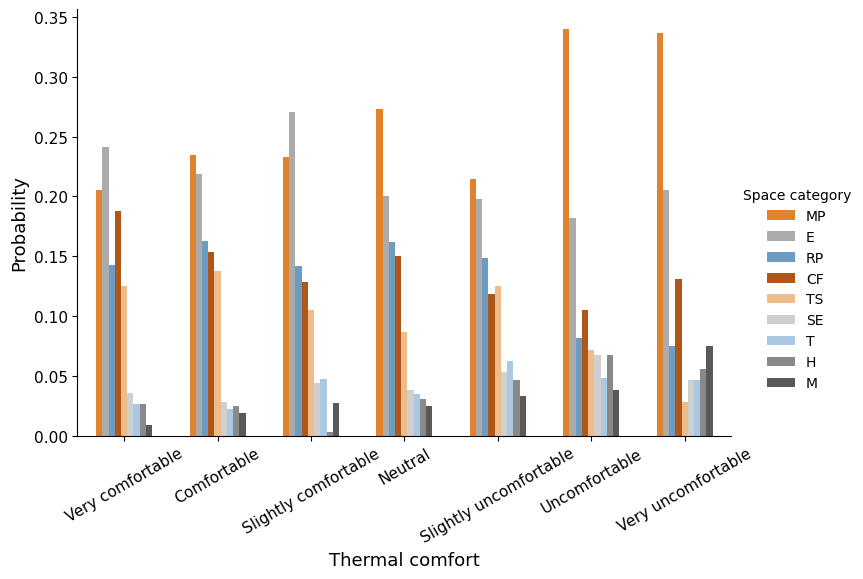

Walking thermal comfort wTCV


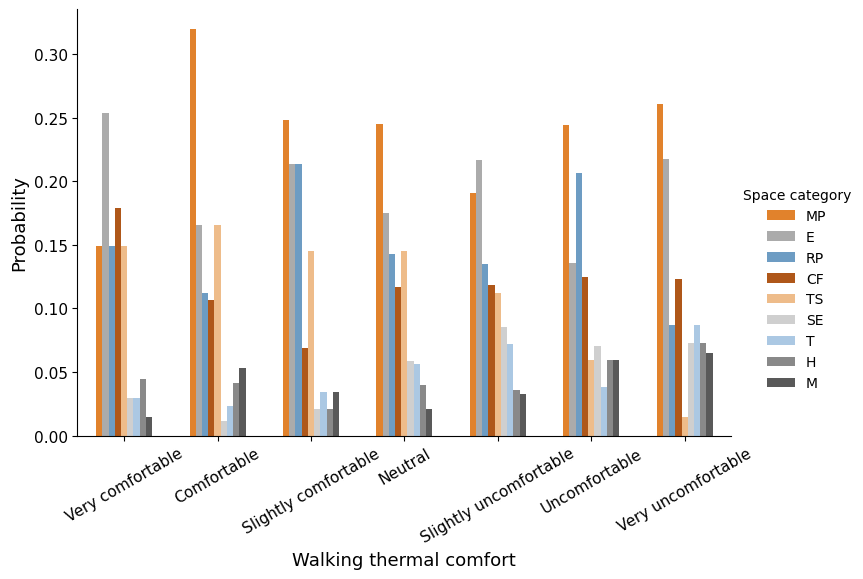

Thermal sensation TSV


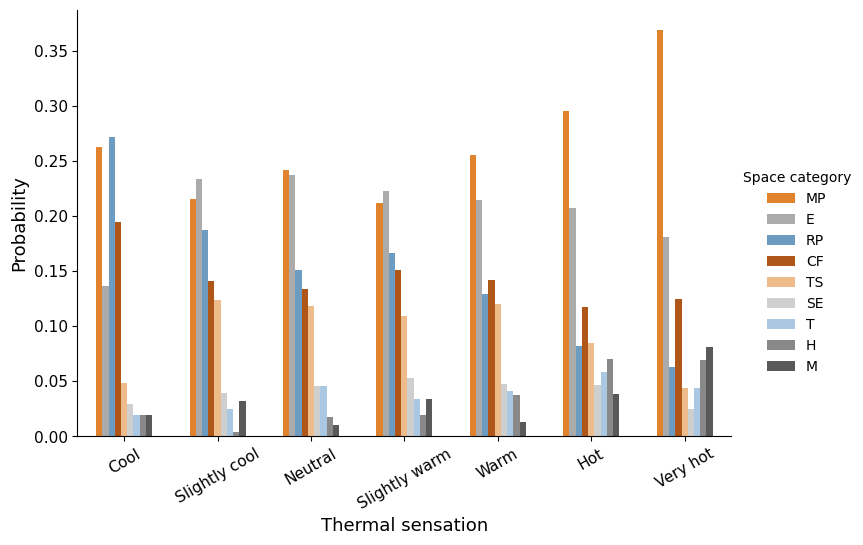

In [26]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


space_order = ['MP','E','RP','CF', 'TS', 'SE', 'T', 'H', 'M']
space_labels_clean = ['MP','E','RP','CF', 'TS', 'SE', 'T', 'H', 'M']
palette_space = ["#FF800E", "#ABABAB","#5F9ED1","#C85200", "#FFBC79",'#CFCFCF', '#A2C8EC', '#898989' , '#595959']


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes_merged, response_col = 'thermal_comfort',group_col = 'space_category', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Thermal comfort',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes_merged, response_col = 'thermal_comfort_walking',group_col = 'space_category', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Walking thermal comfort',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes_merged, response_col = 'thermal_sensation',group_col = 'space_category', category_order = categories_TSV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Thermal sensation',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

## 3. Space category: 2 large groups (W and BN)

In [27]:
df_votes_merged_grouped = df_votes_merged.reset_index(drop=True)

merged_categories = []

for i in range(len(df_votes_merged)):
    
    if df_votes_merged['space_category'][i] == 'MP':
        merged_categories.append('W')
        
    elif df_votes_merged['space_category'][i] == 'RP':
        merged_categories.append('W')
        
    elif df_votes_merged['space_category'][i] == 'SE':
        merged_categories.append('W')
        
    elif df_votes_merged['space_category'][i] == 'CF':
        merged_categories.append('W')
        
    elif df_votes_merged['space_category'][i] == 'TS':
        merged_categories.append('W')
        
    else:
        merged_categories.append('BN')
        
        
df_votes_merged_grouped['merged_space_category'] = merged_categories

merged_space_category
W     1274
BN     593
Name: count, dtype: int64
-------------------

merged_space_category
W     68.2
BN    31.8
Name: proportion, dtype: float64


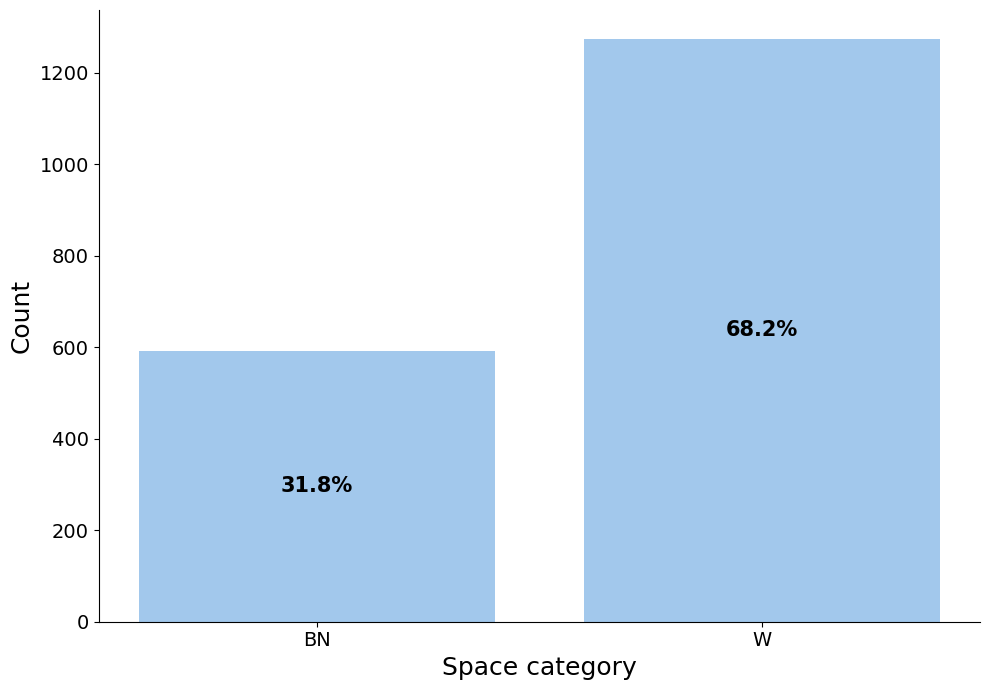

In [29]:
print(df_votes_merged_grouped['merged_space_category'].value_counts())
print('-------------------')
print('')
print(df_votes_merged_grouped['merged_space_category'].value_counts(normalize=True).mul(100).round(1))


space_order = ['BN','W']

# Count the number of occurrences for each neighbourhood group and sort
counts = df_votes_merged_grouped['merged_space_category'].value_counts().reindex(space_order)
total = counts.sum()

space_labels_raw = counts.index.tolist()
space_labels_clean = space_order = ['BN','W']  # For display

# Define custom colors for each neighbourhood group (optional, can be changed)
colors = ["#A2C8EC", "#A2C8EC"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(space_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=15, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Space category', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

Thermal comfort TCV


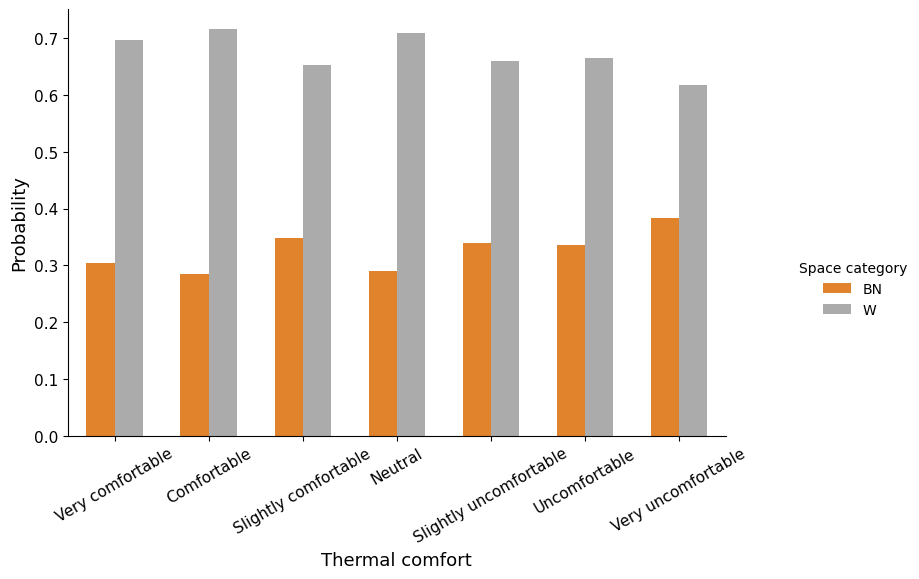

Walking thermal comfort wTCV


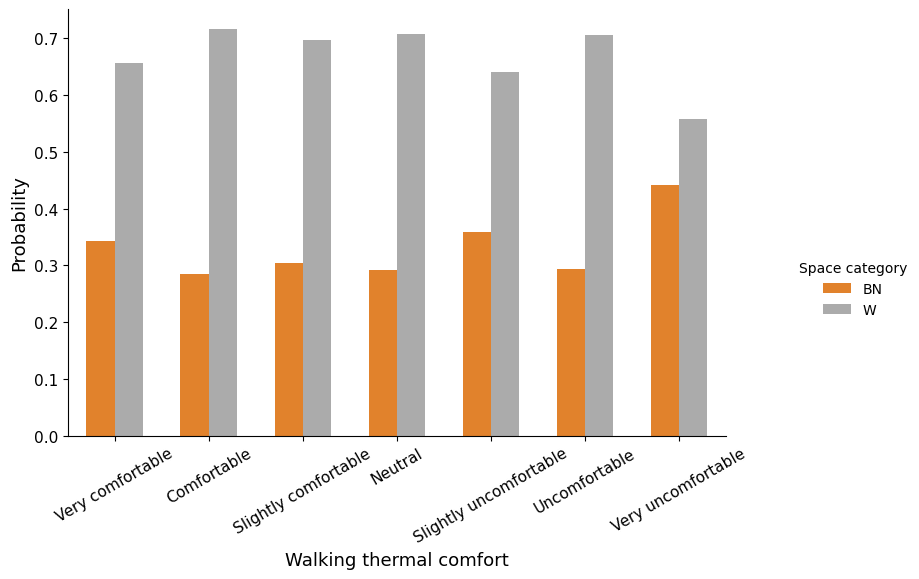

Thermal sensation TSV


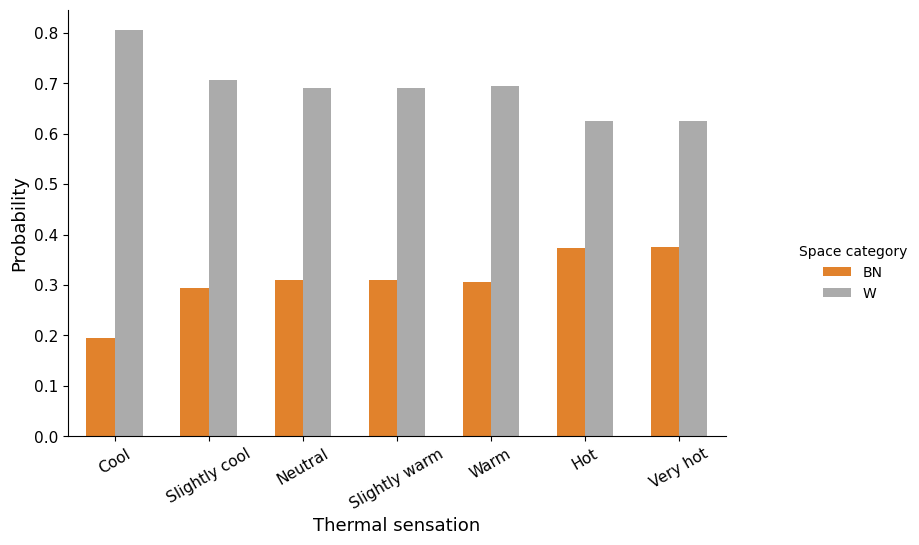

In [30]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


space_order = ['BN','W']
space_labels_clean = ['BN','W']
palette_space = ["#FF800E", "#ABABAB"]


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes_merged_grouped, response_col = 'thermal_comfort',group_col = 'merged_space_category', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Thermal comfort',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes_merged_grouped, response_col = 'thermal_comfort_walking',group_col = 'merged_space_category', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Walking thermal comfort',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes_merged_grouped, response_col = 'thermal_sensation',group_col = 'merged_space_category', category_order = categories_TSV, 
                  group_palette = palette_space, hue_order = space_order, xlabel='Thermal sensation',
                  legend_title = 'Space category', group_labels = space_labels_clean) 

In [31]:
def survey_plot(results, category_names, column_name=None):
    '''
    Plots a horizontal stacked bar chart showing the percentage distribution of responses across ordered categories.
    Special styling is applied for specific cases like 'thermal_sensation'.

    Parameters:
        results (dict): Keys are group labels (e.g., 'All', 'Women', 'Men'), 
                        values are lists of counts per category (must match category_names length).
        category_names (list): Ordered list of category labels (e.g., from cool to hot).
        column_name (str, optional): If set to 'thermal_sensation', applies specific color customizations.

    Returns:
        fig, ax: The matplotlib Figure and Axes objects.
    '''

    labels = list(results.keys())
    data = np.array(list(results.values()))  # Shape: (n_groups, n_categories)

    # Convert to percentages
    total_votes = data.sum(axis=1)
    percentages = ((data.T / total_votes) * 100).T
    cumulative = percentages.cumsum(axis=1)

    # Define color palette
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (label, color) in enumerate(zip(category_names, category_colors)):
        # Optional color override for thermal_sensation
        if column_name == 'thermal_sensation':
            if i == 2:  # Neutral category (index 2)
                color = category_colors[3]
            elif i == 3:
                color = np.array([0.98746328, 0.9067397, 0.65926182, 1.])  # Light beige

        widths = percentages[:, i]
        starts = cumulative[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75, label=label, color=color)

        for j, rect in enumerate(rects):
            if widths[j] > 2:  # Only show text if the bar segment is visible
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + rect.get_height() / 2,
                    f'{int(round(widths[j]))}%',
                    ha='center', va='center', fontsize=11, color='black'
                )

        # Add 1–7 scale below bar (only once for the first row)
        if len(labels) == 1:
            if i == 0:
                center = cumulative[0][i] / 2
            else:
                center = cumulative[0][i - 1] + (widths[0] / 2)
            ax.text(center, 0.7, str(i + 1), fontsize=11, ha='center')

    # Add quartile lines
    for x in [25, 50, 75]:
        ax.axvline(x, ymin=0.05, ymax=0.95, color='black', linestyle='--', linewidth=1, alpha=0.3)

    # Clean up axes
    ax.tick_params(labelsize=14)
    #for spine in ['top', 'bottom', 'left', 'right']:
        #ax.spines[spine].set_visible(False)

    return fig, ax


Thermal comfort TCV


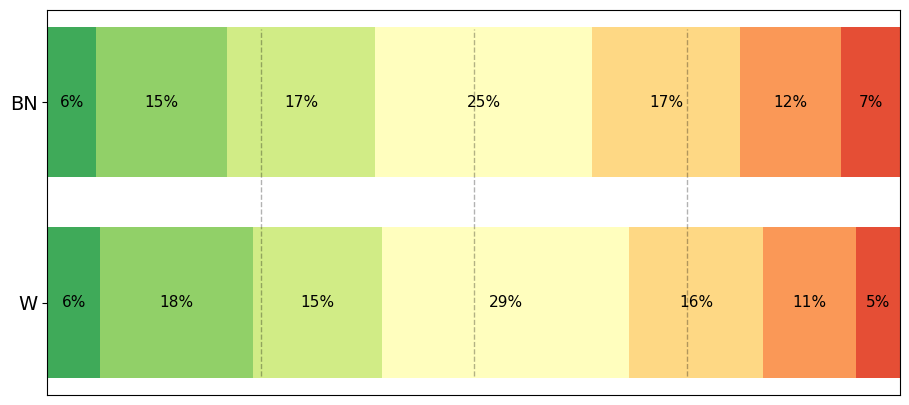

Walking thermal wTCV


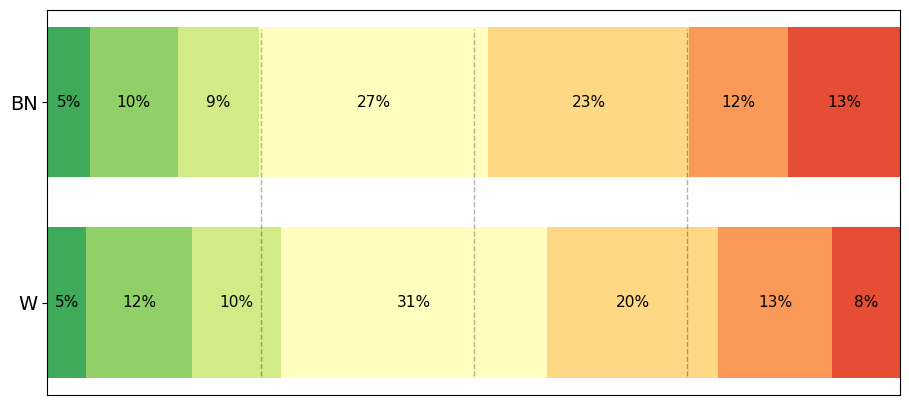

Thermal sensation TSV


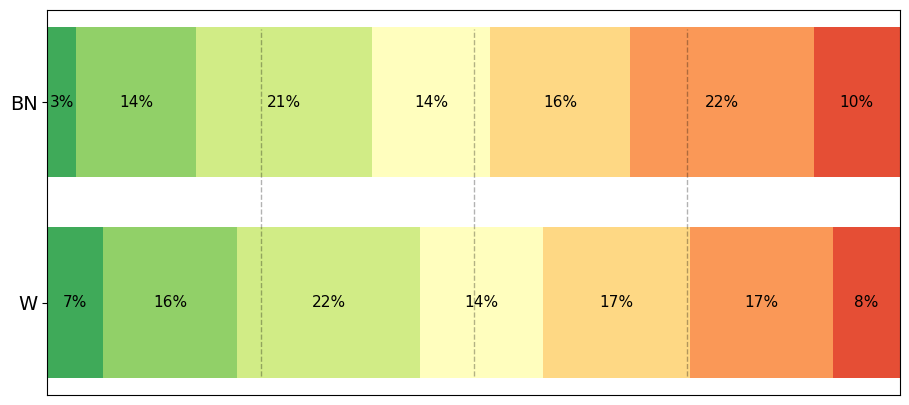

In [33]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']

categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


def count_responses_for_space(df, name_column, name_group, order_list):
    result = {}

    # Personalized tags for the gender
    tags_age = {"BN": "BN", "W": "W"}
    
    # Count by gender
    for space, tags in tags_age.items():
        filtered = df[df[name_group] == space]
        counts = filtered[name_column].value_counts().reindex(order_list, fill_value=0)
        result[tags] = counts.tolist()

    return result


# BAR-PLOT THERMAL COMFORT
print('Thermal comfort TCV')
results_space_TCV = count_responses_for_space(df_votes_merged_grouped, 'thermal_comfort', 'merged_space_category', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_space_TCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Walking thermal wTCV')
results_space_wTCV = count_responses_for_space(df_votes_merged_grouped, 'thermal_comfort_walking', 'merged_space_category', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_space_wTCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Thermal sensation TSV')
results_space_TSV = count_responses_for_space(df_votes_merged_grouped, 'thermal_sensation', 'merged_space_category', categories_TSV )
fig, ax = survey_plot(results_space_TSV, categories_TSV)  # Plot
plt.show()


<br>

## 4. Correlation between sociodemographic traits

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def sociodemographic_heatmap(
    df,
    row_col,
    col_col,
    row_order=None,
    col_order=None,
    row_labels=None,
    col_labels=None,
    cmap='Blues',
    vmin=0,
    vmax=100,
    figsize=(10, 7),
    fontsize=16,
    colorbar_ticks=None,
    colorbar_label_format="{:.0f}%"
):
    
    """
    Plots a normalized percentage heatmap between two categorical sociodemographic variables.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with categorical variables to cross-tabulate.
    
    row_col : str
        Name of the column to use for rows (y-axis).
    
    col_col : str
        Name of the column to use for columns (x-axis).
    
    row_order : list, optional
        Custom row order (default is alphabetical).
    
    col_order : list, optional
        Custom column order (default is alphabetical).
    
    row_labels : list, optional
        Display labels for row categories (used on y-axis).
    
    col_labels : list, optional
        Display labels for column categories (used on x-axis).
    
    cmap : str, default='Blues'
        Color map to use for heatmap.
    
    vmin : float, default=0
        Minimum value for color scale.
    
    vmax : float, default=100
        Maximum value for color scale.
    
    figsize : tuple, default=(10, 7)
        Size of the plot.
    
    fontsize : int, default=16
        Font size for labels and annotations.
    
    colorbar_ticks : list, optional
        Custom ticks for the colorbar (e.g., [10, 20, 30]).
    
    colorbar_label_format : str, default='{:.0f}%'
        Format string for colorbar labels.

    Returns
    -------
    None
        Displays the heatmap.
    """

    # Create raw contingency table
    table = pd.pivot_table(df, index=row_col, columns=col_col, aggfunc="size", fill_value=0)

    # Apply ordering if provided
    if row_order:
        table = table.reindex(index=row_order)
    if col_order:
        table = table.reindex(columns=col_order)

    # Normalize column-wise to get percentages per column group
    table_norm = table.div(table.sum(axis=0), axis=1) * 100
    table_annot = table_norm.applymap(lambda x: f"{x:.0f}%")

    # Set up plot
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = sns.heatmap(
        table_norm,
        yticklabels=row_labels if row_labels else table_norm.index,
        xticklabels=col_labels if col_labels else table_norm.columns,
        annot=table_annot,
        fmt='',
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        annot_kws={"fontsize": fontsize}
    )

    # Axis label settings
    heatmap.set_xlabel('', fontsize=fontsize + 2, labelpad=18)
    heatmap.set_ylabel('', fontsize=fontsize + 2, labelpad=18)

    # Tick font sizes
    for label in heatmap.get_xticklabels():
        label.set_fontsize(fontsize)
    for label in heatmap.get_yticklabels():
        label.set_fontsize(fontsize)

    # Colorbar customization
    colorbar = heatmap.collections[0].colorbar
    if not colorbar_ticks:
        colorbar_ticks = np.arange(vmin, vmax + 1, 10)
    colorbar.set_ticks(colorbar_ticks)
    tick_labels = [colorbar_label_format.format(x) for x in colorbar_ticks]
    colorbar.set_ticklabels(tick_labels)
    colorbar.ax.tick_params(labelsize=fontsize)

    ax.set_aspect("auto")
    plt.tight_layout()
    plt.show()


In [40]:
# First, we need to exclude non-binary and don't want to answer responses from the gender sociodem, and then group the ages in 3
# categories (<12, 13-15 and >16)

df_votes_gender = df_votes.copy()
df_votes_gender = df_votes_gender[(df_votes_gender['gender'] == 'Man') | (df_votes_gender['gender']=='Woman')].reset_index(drop=True)

age=[]
for i in range(len(df_votes_gender)):
    if df_votes_gender['age2'][i] == '<12':
        age.append('<12')     
        
    elif df_votes_gender['age2'][i] == '13-15':
        age.append('13-15')
       
    else:
        age.append('>16')

df_votes_gender_age = df_votes_gender.copy()
df_votes_gender_age['age3'] = age




### 4.1. Age vs Spent time

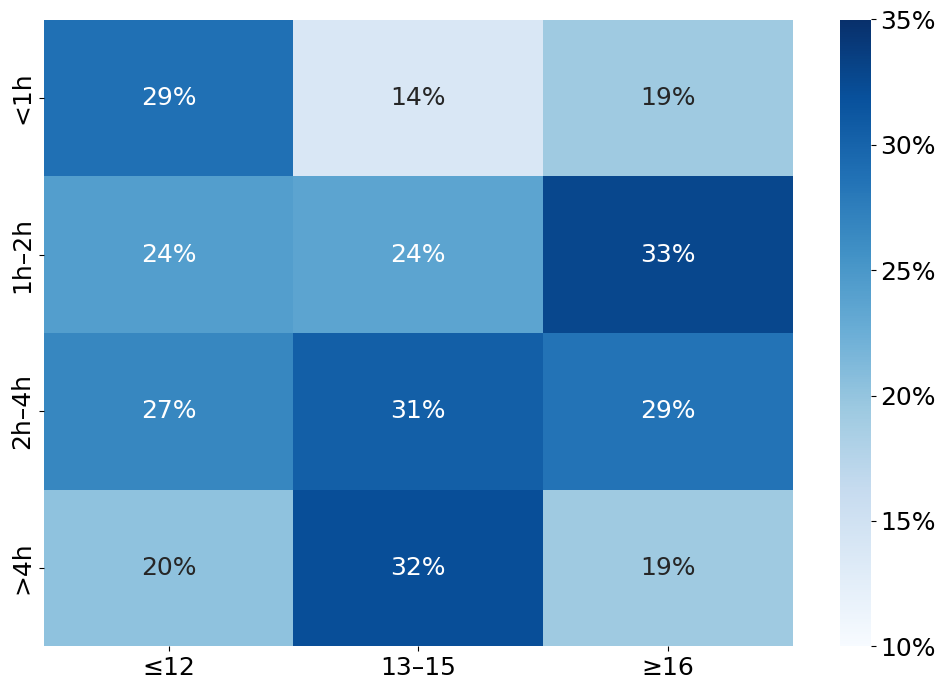

In [41]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='spent_time2',
    col_col='age3',
    row_order=['<1h', '1h - 2h', '2h - 4h', '>4h'],
    col_order=['<12', '13-15', '>16'],
    row_labels=['<1h', '1h–2h', '2h–4h', '>4h'],
    col_labels=['≤12', '13–15', '≥16'],
    cmap='Blues',
    vmin=10,
    vmax=35,
    colorbar_ticks=[10, 15, 20, 25, 30, 35],
    fontsize=18
)

### 4.2. Age vs Neighbourhood knowledge

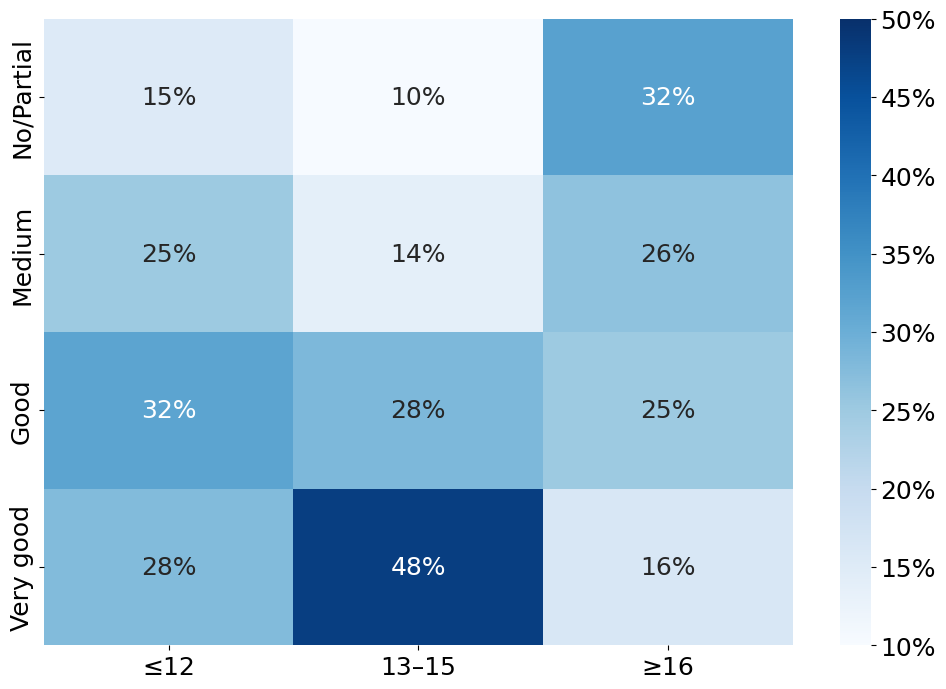

In [53]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='neighbourhood_knowledge2',
    col_col='age3',
    row_order=['No/Partial knowledge','Medium knowledge','Good knowledge','Very good knowledge'],
    col_order=['<12', '13-15', '>16'],
    row_labels=['No/Partial', 'Medium', 'Good', 'Very good'],
    col_labels=['≤12', '13–15', '≥16'],
    cmap='Blues',
    vmin=10,
    vmax=50,
    colorbar_ticks=[10, 15, 20, 25, 30, 35, 40, 45, 50],
    fontsize=18
)

### 4.3. Gender vs Spent time


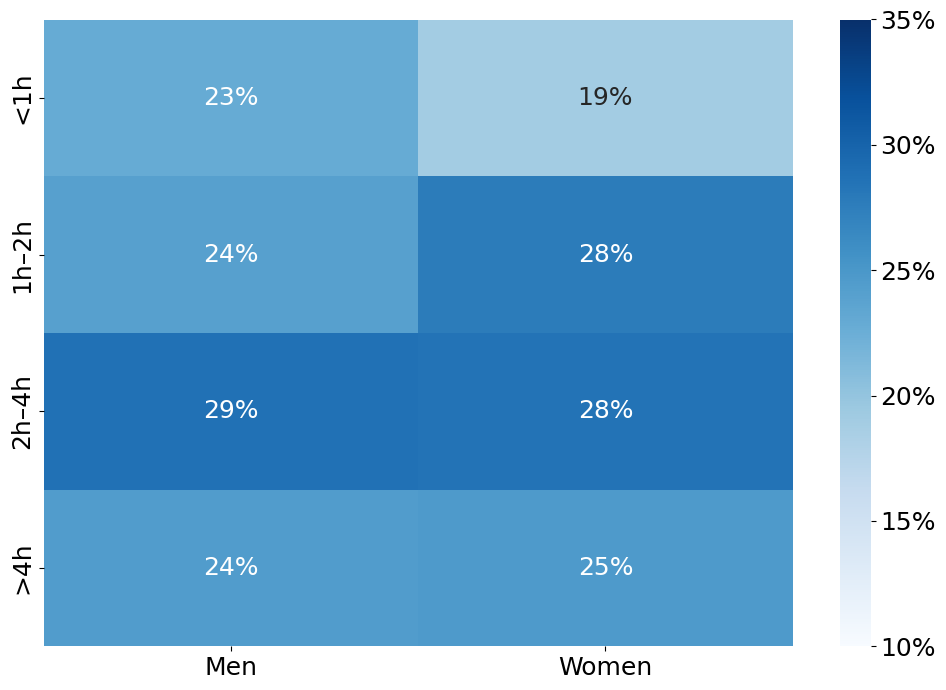

In [48]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='spent_time2',
    col_col='gender',
    row_order=['<1h', '1h - 2h', '2h - 4h', '>4h'],
    col_order=['Man', 'Woman'],
    row_labels=['<1h', '1h–2h', '2h–4h', '>4h'],
    col_labels=['Men', 'Women'],
    cmap='Blues',
    vmin=10,
    vmax=35,
    colorbar_ticks=[10, 15, 20, 25, 30, 35],
    fontsize=18
)

### 4.4. Gender vs Neighbourhood knowledge

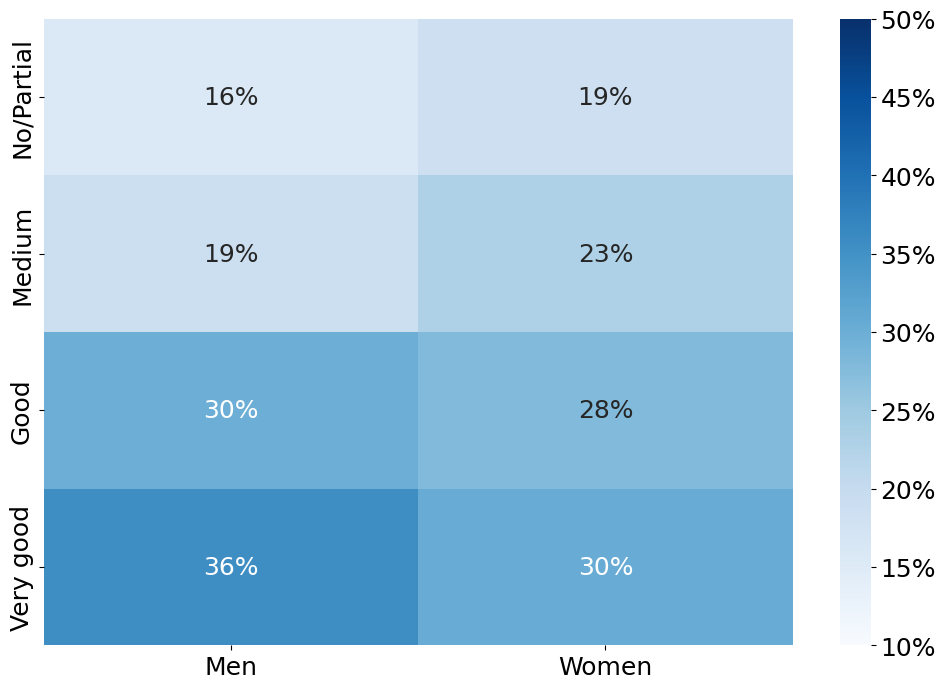

In [67]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='neighbourhood_knowledge2',
    col_col='gender',
    row_order=['No/Partial knowledge','Medium knowledge','Good knowledge','Very good knowledge'],
    col_order=['Man', 'Woman'],
    row_labels=['No/Partial', 'Medium', 'Good', 'Very good'],
    col_labels=['Men','Women'],
    cmap='Blues',
    vmin=10,
    vmax=50,
    colorbar_ticks=[10, 15, 20, 25, 30, 35, 40, 45, 50],
    fontsize=18
)

### 4.5. Gender vs Age

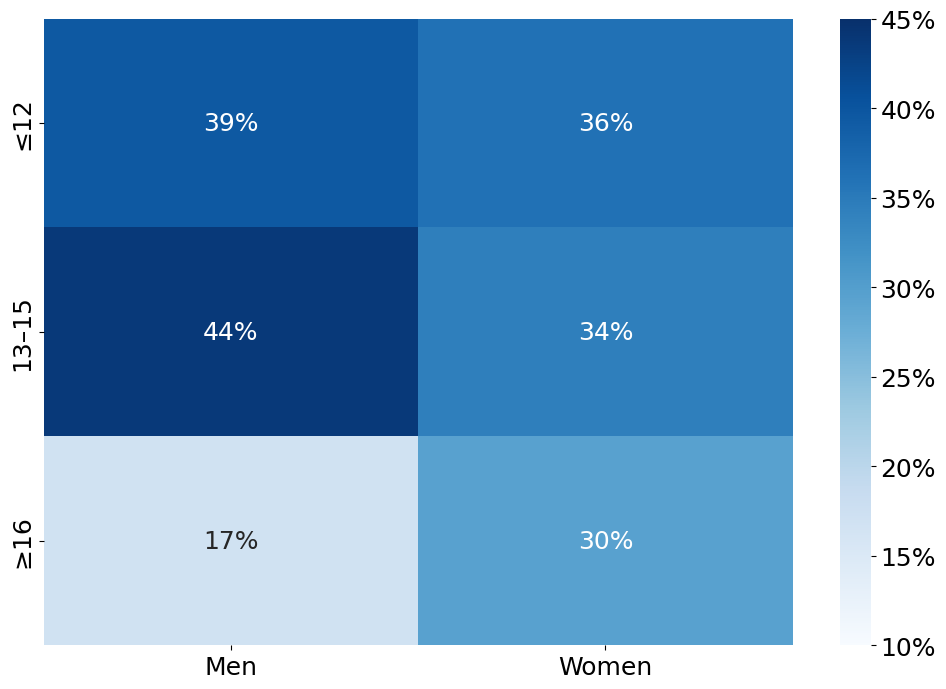

In [68]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='age3',
    col_col='gender',
    row_order=['<12', '13-15', '>16'],
    col_order=['Man', 'Woman'],
    row_labels=['≤12', '13–15', '≥16'],
    col_labels=['Men', 'Women'],
    cmap='Blues',
    vmin=10,
    vmax=45,
    colorbar_ticks=[10, 15, 20, 25, 30, 35, 40, 45],
    fontsize=18
)


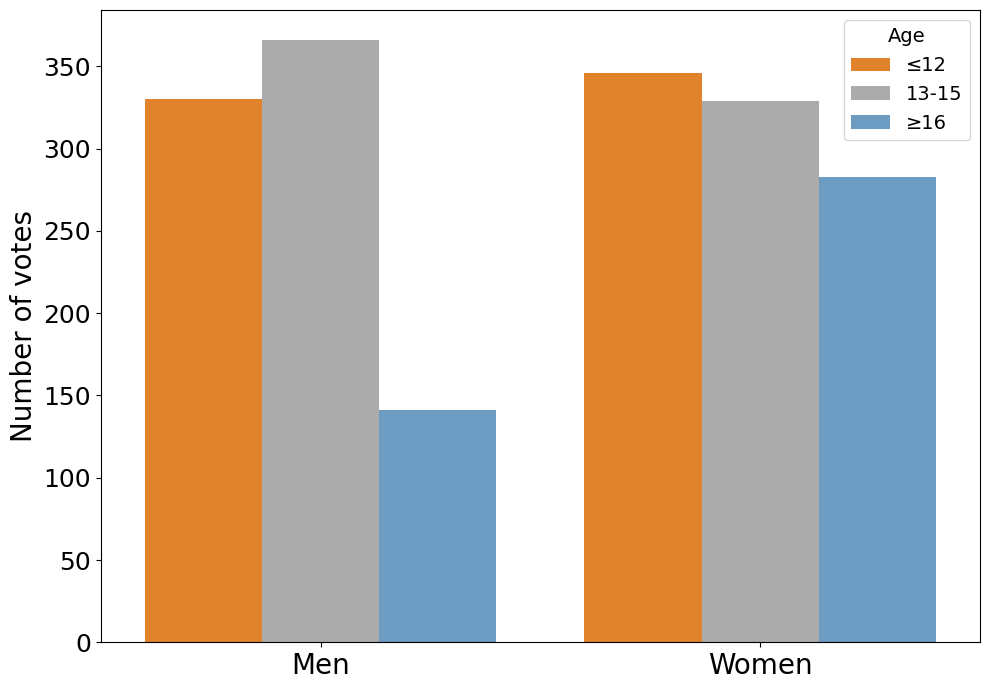

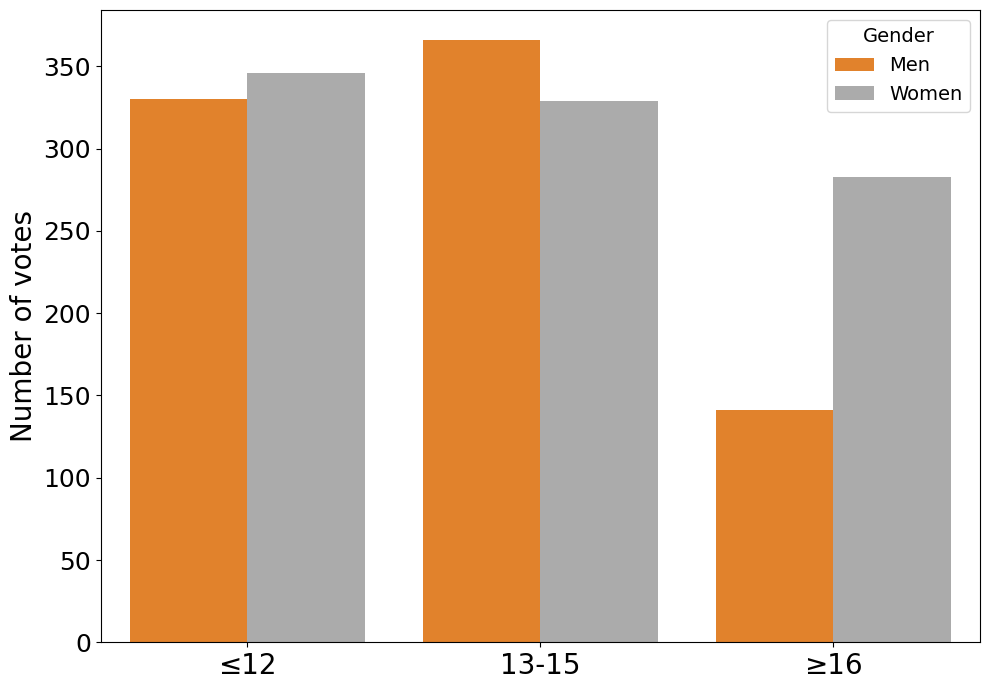

In [69]:
df_votes_gender_age2 = df_votes_gender_age.copy()

df_votes_gender_age2["gender"] = df_votes_gender_age2["gender"].replace({
    "Man": "Men",
    "Woman": "Women"
})

df_votes_gender_age2["age3"] = df_votes_gender_age2["age3"].replace({
    "<12": "≤12",
    "13-15": "13-15",
    ">16": "≥16"
})



import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))


sns.countplot(data=df_votes_gender_age2, x="gender", hue="age3", hue_order = ['≤12','13-15','≥16'],
             palette=["#FF800E", "#ABABAB","#5F9ED1"])

plt.xlabel("")
plt.ylabel("Number of votes",fontsize=20)
plt.legend(title="Age",title_fontsize=14, fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=18)


plt.tight_layout()



plt.show()



fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=df_votes_gender_age2, x="age3", hue="gender",order = ['≤12','13-15','≥16'],
              hue_order = ['Men','Women'],palette=["#FF800E", "#ABABAB"])

plt.xlabel("")
plt.ylabel("Number of votes",fontsize=20)
plt.legend(title="Gender",title_fontsize=14, fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=18)


plt.tight_layout()



plt.show()


### 4.6. Spent time vs Neighbourhood knowledge

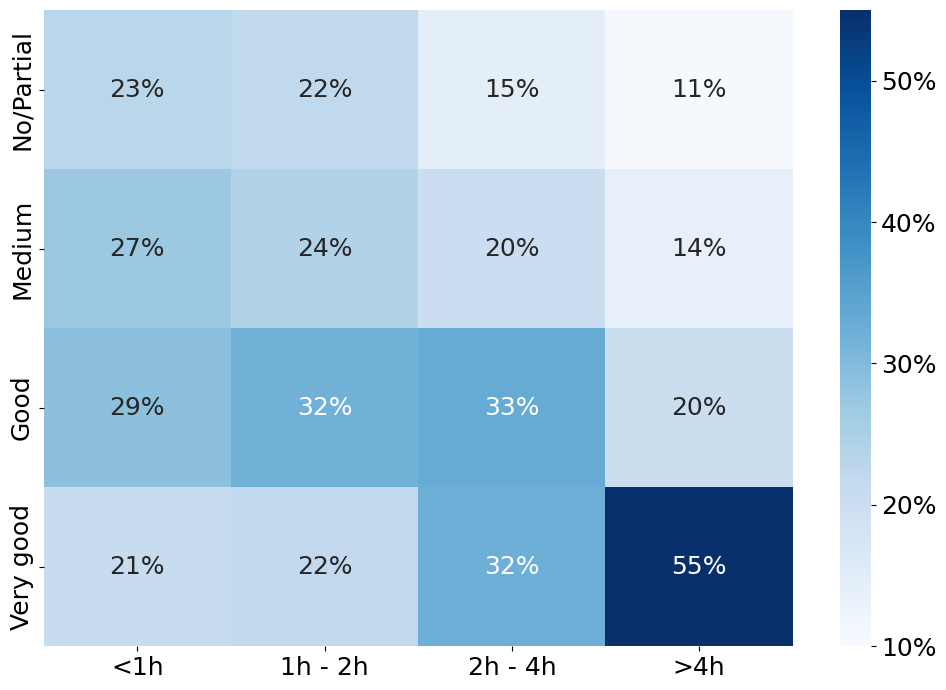

In [70]:
sociodemographic_heatmap(
    df=df_votes_gender_age.copy(),
    row_col='neighbourhood_knowledge2',
    col_col='spent_time2',
    row_order=['No/Partial knowledge','Medium knowledge','Good knowledge','Very good knowledge'],
    col_order=['<1h', '1h - 2h', '2h - 4h', '>4h'],
    row_labels=['No/Partial', 'Medium', 'Good', 'Very good'],
    col_labels=['<1h', '1h - 2h', '2h - 4h', '>4h'],
    cmap='Blues',
    vmin=10,
    vmax=55,
    colorbar_ticks=[10, 20, 30, 40, 50],
    fontsize=18
)


